In [11]:
import numpy
import matplotlib

%matplotlib inline
import matplotlib.pyplot
matplotlib.rcParams['figure.facecolor'] = 'white'

In [30]:
path = '/home/necst/data/experiments/logger/loatt_sweep/20181011_080142'

fixtime = 3

beam1 = '3r'
beam2 = '3l'

In [31]:
beam = [beam1,beam2]

beam_list = ['2l', '2r', '3l', '3r',
                       '4l', '4r', '5l', '5r', 
                       '1lu', '1ll', '1ru', '1rl']

loatt_beam_list = ['2l', '2r', '3l', '3r',
                       '4l', '4r', '5l', '5r', 
                       '1l', '1r' ]



beam1_idx = beam_list.index(beam1)
beam2_idx = beam_list.index(beam2)
beam_idx = [beam1_idx, beam2_idx]

datatime_file = numpy.loadtxt(path + '/datatime.txt')
sis_cur_file = numpy.loadtxt( path + '/sis_cur.txt')
loatt_cur_file = numpy.loadtxt( path + '/loatt.txt')
power_file = numpy.loadtxt(path + '/power.txt')

datatime = datatime_file
elapsed_time = datatime - datatime[0]

ncol = 2
nrow = 1
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 100
matplotlib.rcParams['font.size'] = 20

figsize = (ncol * 8, nrow * 8)

In [32]:
len(sis_cur_file)

27649

In [33]:
trimtime = 0.1
roop = int(elapsed_time[-1] / fixtime)

time = [elapsed_time[(i * fixtime + trimtime < elapsed_time)
                                        & (elapsed_time < (i + 1) * fixtime - trimtime)]
              for i in range(roop)]

sis_cur = [[sis_cur_file[:, loatt_beam][(i * fixtime + trimtime < elapsed_time) 
                                        & (elapsed_time < (i + 1) * fixtime - trimtime)]
                  for i in range(roop)] for loatt_beam in range(len(beam_list))]
loatt_cur = [[loatt_cur_file[:, beam][(i * fixtime + trimtime < elapsed_time) 
                                        & (elapsed_time < (i + 1) * fixtime - trimtime)]
                  for i in range(roop)] for beam in range(len(loatt_beam_list))]

power = [[power_file[:, beam][(i * fixtime + trimtime < elapsed_time) 
                                        & (elapsed_time < (i + 1) * fixtime - trimtime)]
                  for i in range(roop)] for beam in range(2)]

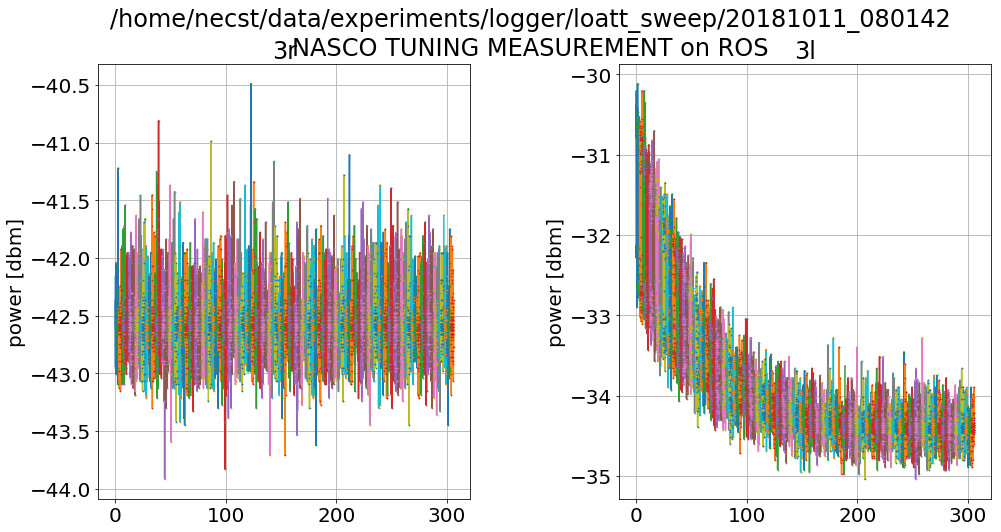

In [34]:
matplotlib.rcParams['savefig.dpi'] = 500

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _beam, _ in zip(ax, beam, range(len(beam))):
    [_ax.plot(time[_roop], power[_][_roop]) for _roop in range(roop)]
    [_ax.plot(time[_roop], power[_][_roop], '.', markersize=1) for _roop in range(roop)]
    _ax.grid()
    
    _ax.set_ylabel('power [dbm]')
    _ax.set_title('{}'.format(_beam))
    
fig.subplots_adjust(wspace=0.4, hspace=0.4)
fig.suptitle(path + '\nNASCO TUNING MEASUREMENT on ROS', size=24)

#matplotlib.pyplot.savefig('./check_data.png')
matplotlib.pyplot.show()

In [35]:
# calc param.

ave = 3
Thot = 300
Tcold = 77

power_sorted = [[numpy.array(sorted(_power)) for _power in power[i]] 
                                for i in range(len(power))]
hot = [numpy.array([numpy.mean(_power[-ave-1:-1]) for _power in power_sorted[i]])
             for i in range(len(power_sorted))]
cold= [numpy.array([numpy.mean(_power[0:ave+1]) for _power in power_sorted[i]])
             for i in range(len(power_sorted))]

y = [_hot - _cold for _hot, _cold in zip(hot, cold)]
HOT = [10 ** (_hot / 10) for _hot in hot]
COLD = [10 ** (_cold / 10) for _cold in cold]
Y = [10 ** (_y / 10) for _y in y]
Trx = [(Tcold * _Y - Thot) / (1 - _Y) for _Y in Y]

loatt_current = [numpy.array([numpy.mean(_loatt_cur) for _loatt_cur in loatt_cur[i]])
                    for i in range(len(loatt_beam_list))]
current = [numpy.array([numpy.mean(_sis_cur) for _sis_cur in sis_cur[i]])
                    for i in range(len(beam_list))]

(2, 102)

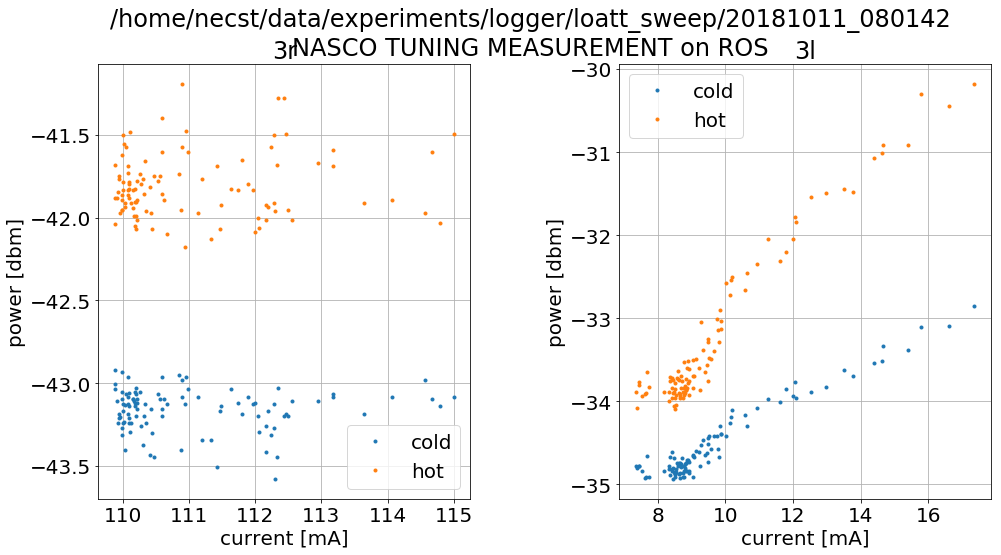

In [36]:
# plot hot / cold

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _beam, idx, _ in zip(ax, beam, beam_idx, range(len(beam))):
    _ax.plot(current[idx], cold[_] , '.',label = 'cold')
    _ax.plot(current[idx], hot[_] , '.',label = 'hot')
    _ax.grid()
    _ax.legend()
    _ax.set_xlabel('current [mA]')
    _ax.set_ylabel('power [dbm]')
    _ax.set_title('{}'.format(_beam))
    
fig.subplots_adjust(wspace=0.4, hspace=0.4)
fig.suptitle(path + '\nNASCO TUNING MEASUREMENT on ROS', size=24)

#matplotlib.pyplot.savefig('./chopper_wheel.png')
matplotlib.pyplot.show()

MemoryError: In RendererAgg: Out of memory

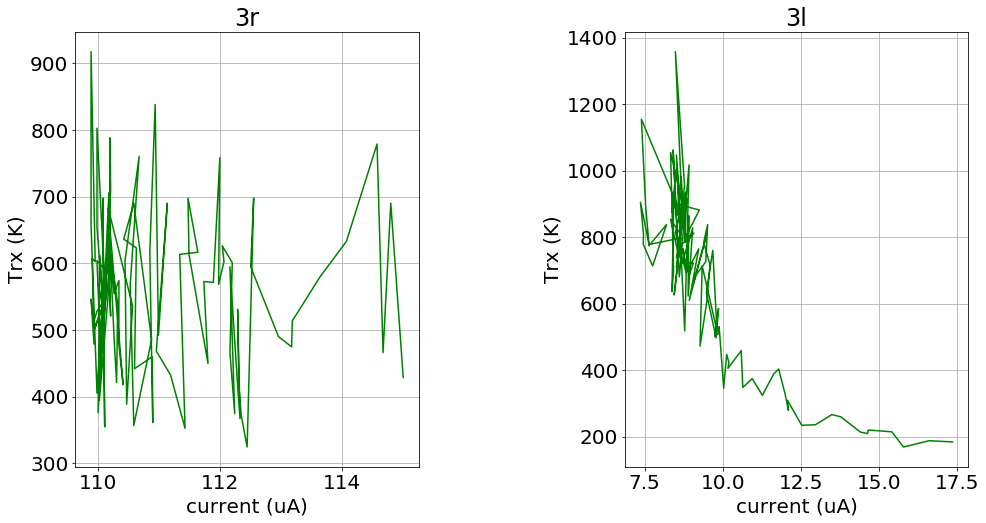

In [48]:
# plot hot / cold

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _beam, idx, _ in zip(ax, beam, beam_idx, range(len(beam))):
    _ax.plot(current[idx], Trx[_], c='green')
    #_ax2 = _ax.twinx()    
    #_ax2.plot(current[idx], loatt_current[idx], c='orange')    
    _ax.grid()
    _ax.set_xlabel('current (uA)')
    _ax.set_ylabel('Trx (K)')
    #_ax2.set_ylabel('current(uA)')
    _ax.set_title('{}'.format(_beam))
    
fig.subplots_adjust(wspace=0.6, hspace=0.6)
#fig.suptitle(path + '\nNASCO TUNING MEASUREMENT on ROS', size=24)

matplotlib.pyplot.savefig('./sisv_trx.png')
matplotlib.pyplot.show()

In [38]:
minTrx_idx = [numpy.argmin(Trx[i]) for i in range(len(Trx))]
minTrx = [_Trx[idx] for _Trx, idx in zip(Trx, minTrx_idx)]
optimum_loatt_current = [loatt_current[idx][minTrx_idx[enu]] for enu, idx in enumerate(beam_idx)]
print('/--- Tuning param.\n\n'
      '[{beam1}] \n loatt_current : {optimum_loatt_current[0]:.3f}mV, Trx : {minTrx[0]:.3f} \n\n'
      '[{beam2}] \n loatt_current : {optimum_loatt_current[1]:.3f}mV, Trx : {minTrx[1]:.3f} \n\n'
      '/-------------------------'.format(**locals()))

/--- Tuning param.

[3r] 
 loatt_current : 1.183mV, Trx : 324.377 

[3l] 
 loatt_current : 0.200mV, Trx : 168.957 

/-------------------------
